In [1]:
exec(open("objet.py").read(), globals())

In [21]:
Param1 = np.linspace(0.2, 0.6, 9)
Param2 = np.linspace(0.2, 0.6, 9)
finaltime = 50

NN_T = np.zeros((len(Param1), len(Param2), finaltime))
WW_T = np.zeros_like(NN_T)

Init = [0.5, 0.5]
for i, param1 in enumerate(Param1):
    for j, param2 in enumerate(Param2):
        O = Ode(model = "allee_effect_adi", Init = Init, Param_phy=[param1, param2], finalTime=finaltime)
        O.Perturbation = np.zeros_like(O.Perturbation)
       # print(O.NbreIte)
        #print(O.Time)
        Y = O.solve_by_part()
        NN_T[i,j,:] = Y[0]
        WW_T[i,j] = Y[1]

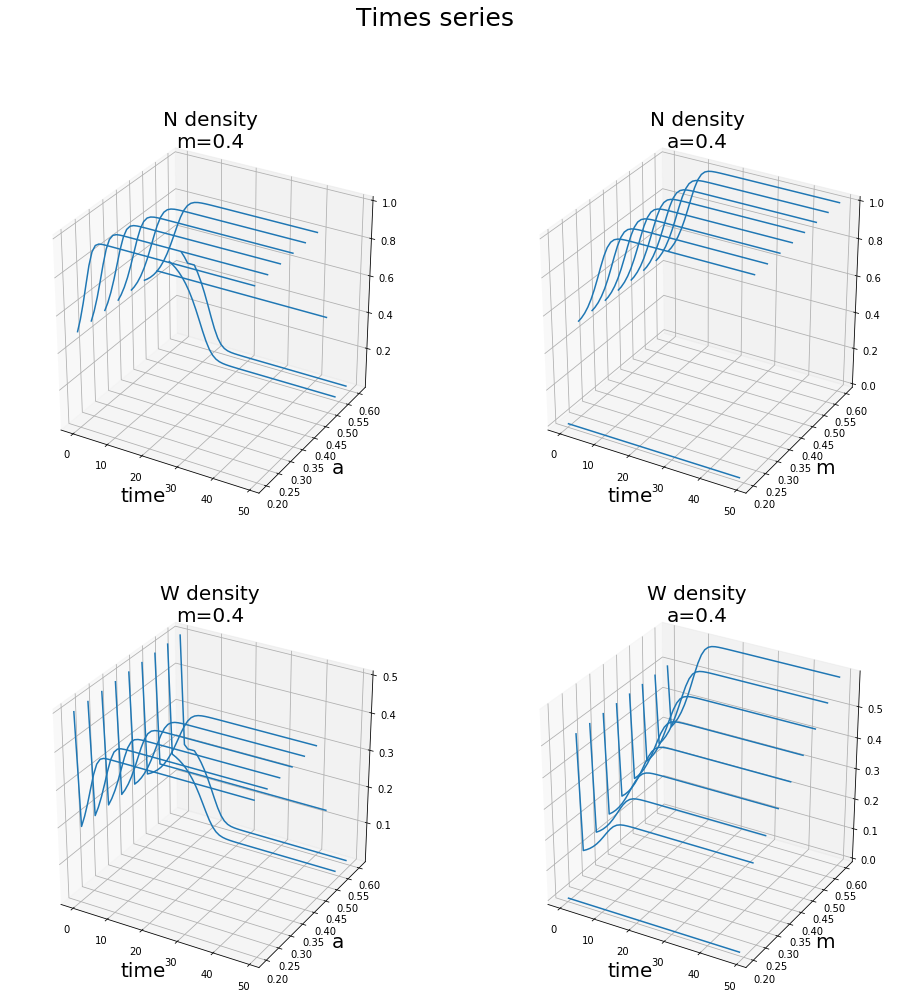

In [22]:
ind_a_default = len(Param1)//2
a_default = Param1[ind_a_default]
ind_m_default = len(Param2)//2
m_default = Param2[ind_m_default]

fig = plt.figure(figsize= (16, 16))
plt.suptitle("Times series ", fontsize=25)

ax = fig.add_subplot(2, 2, 1, projection='3d')
X, Y = np.meshgrid(O.Time, Param1)
plt.title("N density\nm="+str(m_default), fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("a", fontsize=20)
ax.plot_wireframe(X, Y, NN_T[:,ind_m_default,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 2, projection='3d')
X, Y = np.meshgrid(O.Time, Param2)
plt.title("N density\na="+str(a_default), fontsize=20)  
plt.xlabel("time", fontsize=20)
plt.ylabel("m", fontsize=20)
ax.plot_wireframe(X, Y, NN_T[ind_a_default,:,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 3, projection='3d')
X, Y = np.meshgrid(O.Time, Param1)
plt.title("W density\nm="+str(m_default), fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("a", fontsize=20)
ax.plot_wireframe(X, Y, WW_T[:,ind_m_default,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 4, projection='3d')
X, Y = np.meshgrid(O.Time, Param2)
plt.title("W density\na="+str(a_default), fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("m", fontsize=20)
ax.plot_wireframe(X, Y, WW_T[ind_a_default,:,:], rstride=1, cstride=0)

plt.savefig("plot/times_series_3d")
plt.show()